In [1]:
import numpy as np
import pandas as pd
import scipy
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import copy
import logging
import missingno
from collections import Counter

from sklearn.model_selection import (
    train_test_split,
    GridSearchCV,
    RandomizedSearchCV,
    cross_val_score,
    learning_curve,
    KFold
)
from sklearn.preprocessing import (
    LabelEncoder,
    OrdinalEncoder,
    StandardScaler,
    MinMaxScaler,
    RobustScaler,
    LabelBinarizer, 
    MultiLabelBinarizer,
    MaxAbsScaler,
    QuantileTransformer,
    PowerTransformer,
    Normalizer
)
from category_encoders import TargetEncoder
from sklearn.feature_extraction import (
    DictVectorizer, 
    FeatureHasher
)
from sklearn.linear_model import (
    LogisticRegression,
    LinearRegression,
    Ridge,
    Lasso,
    ElasticNet
)
from imblearn.over_sampling import (
    SMOTE,
    RandomOverSampler
)
from imblearn.under_sampling import (
    TomekLinks, 
    RandomUnderSampler
)
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import (
    KNeighborsClassifier,
    KNeighborsRegressor,
    NearestNeighbors
)
from sklearn.svm import (
    SVC,
    SVR
)
from sklearn.tree import (
    DecisionTreeClassifier,
    DecisionTreeRegressor
)
from sklearn.ensemble import (
    RandomForestClassifier,
    BaggingClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    StackingClassifier,
    RandomForestRegressor,
    BaggingRegressor,
    AdaBoostRegressor,
    GradientBoostingRegressor,
    StackingRegressor
)
from xgboost import XGBClassifier, XGBRegressor
from sklearn.metrics import (
    accuracy_score,
    recall_score,
    precision_score,
    f1_score,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
    matthews_corrcoef,
    balanced_accuracy_score,
    mean_absolute_error,
    mean_squared_error,
    r2_score
)
from scipy.stats import uniform, randint
from fast_ml.model_development import train_valid_test_split
from typing import (
    Any,
    Literal,
    Union,
    List,
    Optional,
    Dict,
    Tuple
)
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, f1_score, matthews_corrcoef, precision_score, recall_score, roc_auc_score, roc_curve, accuracy_score
from sklearn.model_selection import (
    KFold, StratifiedKFold, LeaveOneOut, LeavePOut, RepeatedKFold, TimeSeriesSplit, cross_val_score, learning_curve
)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris


import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Call_def

In [2]:
from ML_overfitting import(
    get_cross_validator,
    Check_Overfitting_Classification,
    Check_Overfitting_Regression,
)

# learning_curves

In [4]:
data = load_iris()
x, y = data.data, data.target

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.1, random_state=42)

In [6]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_valid = scaler.transform(x_valid)

In [ ]:
type_cross_valid = get_cross_validator(cv_type='KFold', cv=5)

In [7]:
def grid_search_classifier(model_name: str, x_train: np.ndarray, y_train: np.ndarray, scoring: str = 'recall', ensemble_estimators: Optional[List[Tuple[str, object]]] = None) -> Tuple[dict, float, object]:
    """
    Perform grid search on a specified classification model to find the best hyperparameters.

    Parameters:
    model_name (str): The name of the classification model to use.
                    ['LogisticRegression', 'NaiveBayes', 'KNN', 'SVM', 'DecisionTree', 'RandomForest', 'BaggingClassifier', 'AdaBoostClassifier', 'GradientBoostingClassifier', 'XGBoost', 'StackingClassifier']
    x_train (np.ndarray): The training input samples.
    y_train (np.ndarray): The target values (class labels) as integers or strings.
    scoring (str): The scoring metric to evaluate the models. Default is 'recall'.
    ensemble_estimators (Optional[List[Tuple[str, object]]]): List of estimators for ensemble methods (Bagging, Stacking). Default is None.

    Returns:
    Tuple[dict, float, object]: The best hyperparameters found by grid search, the best cross-validation score achieved, and the best estimator found by grid search.
    """
    if ensemble_estimators is None:
        ensemble_estimators = [
                ('rf', RandomForestClassifier(n_jobs=-1)),
                ('gb', GradientBoostingClassifier()),
                ('xgb', XGBClassifier())
            ]
    
    # Dictionary mapping model names to models and their hyperparameter grids
    model_params = {
        'LogisticRegression': {
            'model': LogisticRegression(),
            'params': {
                'C': [0.01, 0.1, 1, 10, 100],
                'solver': ['liblinear', 'lbfgs']
            }
        },
        'NaiveBayes': {
            'model': GaussianNB(),
            'params': {}
        },
        'KNN': {
            'model': KNeighborsClassifier(),
            'params': {
                'n_neighbors': [3, 5, 7, 9],
                'weights': ['uniform', 'distance']
            }
        },
        'SVM': {
            'model': SVC(),
            'params': {
                'C': [0.1, 1, 10, 100],
                'kernel': ['linear', 'rbf']
            }
        },
        'DecisionTree': {
            'model': DecisionTreeClassifier(),
            'params': {
                'max_depth': [None, 5, 10, 20, 30],
                'min_samples_split': [2, 5, 10]
            }
        },
        'RandomForest': {
            'model': RandomForestClassifier(n_jobs=-1),
            'params': {
                'n_estimators': [100, 200, 300],
                'max_depth': [None, 5, 10, 20, 30]
            }
        },
        'BaggingClassifier': {
            'model': BaggingClassifier(n_jobs=-1),
            'params': {
                'n_estimators': [10, 50, 100, 200],
                'max_samples': [0.5, 1.0],
                'max_features': [0.5, 1.0]
            }
        },
        'AdaBoostClassifier': {
            'model': AdaBoostClassifier(),
            'params': {
                'n_estimators': [10, 50, 100, 200],
                'learning_rate': [0.01, 0.1, 0.5, 1, 10]
            }
        },
        'GradientBoostingClassifier': {
            'model': GradientBoostingClassifier(),
            'params': {
                'n_estimators': [10, 50, 100, 200],
                'learning_rate': [0.01, 0.1, 0.2, 0.5],
                'max_depth': [3, 5, 7]
            }
        },
        'XGBoost': {
            'model': XGBClassifier(),
            'params': {
                'n_estimators': [10, 50, 100],
                'learning_rate': [0.01, 0.1, 0.2],
                'max_depth': [3, 5, 7]
            }
        },
        'StackingClassifier': {
            'model': StackingClassifier(n_jobs=-1, estimators=ensemble_estimators),
            'params': {
                'final_estimator': [LogisticRegression(), RandomForestClassifier(), GradientBoostingClassifier()],
                'cv': [5, 10]
            }
        }
    }
    
    perfect_model_params = {
        'LogisticRegression': {
            'model': LogisticRegression(),
            'params': {
                'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                'C': [0.01, 0.1, 1, 10, 100],
                'solver': ['liblinear', 'lbfgs', 'newton-cg', 'sag', 'saga'],
                'max_iter': [100, 200, 300]
            }
        },
        'NaiveBayes': {
            'model': GaussianNB(),
            'params': {
                'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05, 1e-04, 1e-03]
            }
        },
        'KNN': {
            'model': KNeighborsClassifier(),
            'params': {
                'n_neighbors': [3, 5, 7, 9, 11],
                'weights': ['uniform', 'distance'],
                'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                'p': [1, 2]
            }
        },
        'SVM': {
            'model': SVC(),
            'params': {
                'C': [0.1, 1, 10, 100],
                'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                'gamma': ['scale', 'auto'],
                'degree': [2, 3, 4],
                'probability': [True, False]
            }
        },
        'DecisionTree': {
            'model': DecisionTreeClassifier(),
            'params': {
                'criterion': ['gini', 'entropy'],
                'splitter': ['best', 'random'],
                'max_depth': [None, 5, 10, 20, 30],
                'min_samples_split': [2, 5, 10],
                'min_samples_leaf': [1, 2, 4],
                'max_features': [None, 'auto', 'sqrt', 'log2']
            }
        },
        'RandomForest': {
            'model': RandomForestClassifier(n_jobs=-1),
            'params': {
                'n_estimators': [100, 200, 300],
                'criterion': ['gini', 'entropy'],
                'max_depth': [None, 5, 10, 20, 30],
                'min_samples_split': [2, 5, 10],
                'min_samples_leaf': [1, 2, 4],
                'max_features': [None, 'auto', 'sqrt', 'log2'],
                'bootstrap': [True, False]
            }
        },
        'BaggingClassifier': {
            'model': BaggingClassifier(n_jobs=-1),
            'params': {
                'n_estimators': [10, 50, 100, 200],
                'max_samples': [0.5, 0.7, 1.0],
                'max_features': [0.5, 0.7, 1.0],
                'bootstrap': [True, False],
                'bootstrap_features': [True, False]
            }
        },
        'AdaBoostClassifier': {
            'model': AdaBoostClassifier(),
            'params': {
                'n_estimators': [50, 100, 200, 300],
                'learning_rate': [0.01, 0.1, 0.5, 1, 10],
                'algorithm': ['SAMME', 'SAMME.R']
            }
        },
        'GradientBoostingClassifier': {
            'model': GradientBoostingClassifier(),
            'params': {
                'loss': ['deviance', 'exponential'],
                'learning_rate': [0.01, 0.1, 0.2, 0.5],
                'n_estimators': [100, 200, 300],
                'max_depth': [3, 5, 7],
                'min_samples_split': [2, 5, 10],
                'min_samples_leaf': [1, 2, 4],
                'max_features': [None, 'auto', 'sqrt', 'log2']
            }
        },
        'XGBoost': {
            'model': XGBClassifier(),
            'params': {
                'learning_rate': [0.01, 0.1, 0.2, 0.3],
                'n_estimators': [100, 200, 300],
                'max_depth': [3, 5, 7],
                'min_child_weight': [1, 3, 5],
                'gamma': [0, 0.1, 0.2],
                'subsample': [0.7, 0.8, 1.0],
                'colsample_bytree': [0.7, 0.8, 1.0],
                'reg_alpha': [0, 0.1, 0.5],
                'reg_lambda': [1, 1.5, 2]
            }
        },
        'StackingClassifier': {
            'model': StackingClassifier(n_jobs=-1, estimators= ensemble_estimators),
            'params': {
                'final_estimator': [LogisticRegression(), RandomForestClassifier(), GradientBoostingClassifier()],
                'cv': [5, 10],
                'stack_method': ['auto', 'predict_proba', 'decision_function', 'predict']
            }
        }
    }
    
    if model_name not in model_params:
        raise ValueError(f"Model {model_name} not recognized. Available models: {list(model_params.keys())}")
    
    model_info = model_params[model_name]
    model = model_info['model']
    param_grid = model_info['params']
    
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, scoring=scoring)
    
    try:
        grid_search.fit(x_train, y_train)
    except Exception as e:
        raise ValueError(f"An error occurred during grid search: {e}")
    
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    best_estimator = grid_search.best_estimator_
    
    return best_params, best_score, best_estimator



In [8]:
best_params, best_score, best_estimator = grid_search_classifier('XGBoost', x_train, y_train)

In [9]:
best_params

{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 10}

In [10]:
model = best_estimator
model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=10, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

Accuracy:
Training Accuracy: 0.9815
Validation Accuracy: 0.8333

Precision:
Training Precision: 0.9825
Validation Precision: 0.8889

Recall:
Training Recall: 0.9815
Validation Recall: 0.8333

F1-Score:
Training F1-Score: 0.9815
Validation F1-Score: 0.8292

MCC:
Training MCC: 0.9727
Validation MCC: 0.7828

Balanced Accuracy:
Training Balanced Accuracy: 0.9810
Validation Balanced Accuracy: 0.8667

Confusion Matrix:
Validation Confusion Matrix:
[[3 0 0]
 [0 3 2]
 [0 0 4]]

Cross-Validation(CV):
Cross-Validation Scores: [0.96666667 0.96666667 0.9        1.         0.93333333]
Cross-Validation Mean Score: 0.9533


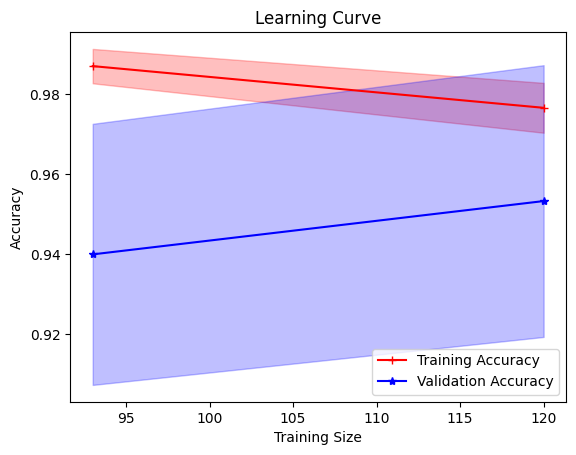

ROC AUC: Not available for this model


In [11]:
Check_Overfitting_Classification(model,x,y,x_train,y_train,x_valid,y_valid,cv_type ='StratifiedKFold' )

# croos_validation

## 1. K-Fold Cross-Validation
The dataset is divided into k equally (or nearly equally) sized folds. The model is trained on k-1 folds and validated on the remaining fold. This process is repeated k times, each time with a different fold as the validation set.
### Use Cases:
- When you have a moderate to large dataset.
- When you want a reliable estimate of model performance with reduced variance.

In [12]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression, LogisticRegression

# For Regression
kf = KFold(n_splits=5)
model = LinearRegression()
scores = cross_val_score(model, x, y, cv=kf, scoring='neg_mean_squared_error')
print("Average MSE:", -scores.mean())

# For Classification
kf = KFold(n_splits=5)
model = LogisticRegression()
scores = cross_val_score(model, x, y, cv=kf, scoring='accuracy')
print("Average Accuracy:", scores.mean())


Average MSE: 0.06897012554624685
Average Accuracy: 0.9266666666666665


## 2. Stratified K-Fold Cross-Validation
Similar to K-Fold, but ensures that each fold has approximately the same percentage of samples of each target class as the original dataset.
### Use Cases:
- When dealing with imbalanced datasets.
- When you want each fold to be representative of the entire dataset's class distribution.

In [13]:
from sklearn.model_selection import StratifiedKFold

# For Regression
skf = StratifiedKFold(n_splits=5)
model = LinearRegression()
scores = cross_val_score(model, x, y, cv=skf, scoring='neg_mean_squared_error')
print("Average MSE:", -scores.mean())

# For Classification
skf = StratifiedKFold(n_splits=5)
model = LogisticRegression()
scores = cross_val_score(model, x, y, cv=skf, scoring='accuracy')
print("Average Accuracy:", scores.mean())

Average MSE: 0.049080321240606385
Average Accuracy: 0.9733333333333334


## 3. Leave-One-Out Cross-Validation (LOOCV)
Each sample is used once as a validation set while the remaining n-1 samples are used as the training set. This is repeated n times.
### Use Cases:
- When you have a very small dataset.
- When you want to use as much data as possible for training in each iteration.

In [14]:
from sklearn.model_selection import LeaveOneOut

# For Regression
loo = LeaveOneOut()
model = LinearRegression()
scores = cross_val_score(model, x, y, cv=loo, scoring='neg_mean_squared_error')
print("Average MSE:", -scores.mean())

# For Classification
loo = LeaveOneOut()
model = LogisticRegression()
scores = cross_val_score(model, x, y, cv=loo, scoring='accuracy')
print("Average Accuracy:", scores.mean())

Average MSE: 0.0495418532518458
Average Accuracy: 0.9666666666666667


## 4. Leave-P-Out Cross-Validation
Definition: Similar to LOOCV, but instead of leaving out one sample, p samples are left out for validation, and the remaining n-p samples are used for training. This is repeated for all possible combinations.
### Use Cases:
- When you want a thorough evaluation of model performance, although it is computationally intensive and typically used only for very small datasets.

In [15]:
from sklearn.model_selection import LeavePOut

# For Regression
lpo = LeavePOut(p=2)
model = LinearRegression()
scores = cross_val_score(model, x, y, cv=lpo, scoring='neg_mean_squared_error')
print("Average MSE:", -scores.mean())

# For Classification
lpo = LeavePOut(p=2)
model = LogisticRegression()
scores = cross_val_score(model, x, y, cv=lpo, scoring='accuracy')
print("Average Accuracy:", scores.mean())

Average MSE: 0.04955326303718633
Average Accuracy: 0.9652796420581655


## 5. Repeated K-Fold Cross-Validation
Repeats K-Fold cross-validation n times with different splits each time.
### Use Cases:
- When you want to reduce the variance of your model performance estimates further.
- When you have enough computational resources to handle multiple runs of K-Fold.

In [16]:
from sklearn.model_selection import RepeatedKFold

# For Regression
rkf = RepeatedKFold(n_splits=5, n_repeats=10, random_state=1)
model = LinearRegression()
scores = cross_val_score(model, x, y, cv=rkf, scoring='neg_mean_squared_error')
print("Average MSE:", -scores.mean())

# For Classification
rkf = RepeatedKFold(n_splits=5, n_repeats=10, random_state=1)
model = LogisticRegression()
scores = cross_val_score(model, x, y, cv=rkf, scoring='accuracy')
print("Average Accuracy:", scores.mean())


Average MSE: 0.049928616872208106
Average Accuracy: 0.9606666666666667


## 6. Time Series Split
Used for time series data, where the training set consists of all observations up to a certain time point and the test set consists of all observations after that time point. This is done incrementally.
### Use Cases:
- When working with time series data where the order of data points matters.

In [17]:
from sklearn.model_selection import TimeSeriesSplit

# For Time Series Regression or Classification
tscv = TimeSeriesSplit(n_splits=5)
model = LinearRegression()
scores = cross_val_score(model, x, y, cv=tscv, scoring='neg_mean_squared_error')
print("Average MSE:", -scores.mean())

Average MSE: 0.29788082072438954


## Summary
- K-Fold Cross-Validation: Standard method, good for general use.
- Stratified K-Fold Cross-Validation: Best for imbalanced classification data.
- LOOCV: Useful for small datasets.
- Repeated K-Fold Cross-Validation: Provides more robust performance estimates.
- Time Series Split: Best for time series data.

# compare_all_type_of_croos_validation

In [18]:
# Initialize classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Support Vector Classifier": SVC()
}

In [19]:
# Dictionary to store results
results = {name: {} for name in classifiers.keys()}

In [20]:
# Cross-validation methods
cv_methods = {
    "K-Fold": KFold(n_splits=5, shuffle=True, random_state=42),
    "Stratified K-Fold": StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    "Leave-One-Out": LeaveOneOut(),
    "Leave-P-Out": LeavePOut(p=2),
    "Repeated K-Fold": RepeatedKFold(n_splits=5, n_repeats=10, random_state=42),
    "Time Series Split": TimeSeriesSplit(n_splits=5)
}

In [21]:
# Perform cross-validation for each classifier and each method
for clf_name, clf in classifiers.items():
    for method_name, cv in cv_methods.items():
        try:
            if method_name == "Time Series Split":
                # Create a time series dataset
                time_series_data = np.array(range(100)).reshape(-1, 1)
                time_series_target = np.array([0 if x < 50 else 1 for x in range(100)])
                scores = cross_val_score(clf, time_series_data, time_series_target, cv=cv, error_score='raise')
            else:
                scores = cross_val_score(clf, x, y, cv=cv, error_score='raise')
            results[clf_name][method_name] = scores.mean()
        except ValueError as e:
            print(f"Error during cross-validation with {method_name} for {clf_name}: {e}")
            results[clf_name][method_name] = np.nan

Error during cross-validation with Time Series Split for Logistic Regression: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 0
Error during cross-validation with Time Series Split for Support Vector Classifier: The number of classes has to be greater than one; got 1 class


In [22]:
# Convert results to a DataFrame for easier plotting
results_df = pd.DataFrame(results)
results_df

,Logistic Regression,Decision Tree,Support Vector Classifier
K-Fold,0.973333,0.953333,0.966667
Stratified K-Fold,0.966667,0.953333,0.966667
Leave-One-Out,0.966667,0.940000,0.966667
Leave-P-Out,0.965280,0.948904,0.965548
Repeated K-Fold,0.964000,0.948667,0.960000
Time Series Split,NaN,0.975000,NaN


<Figure size 1200x800 with 0 Axes>

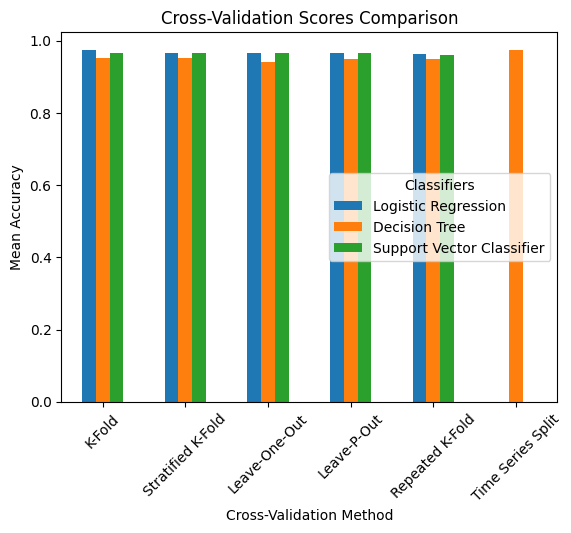

In [23]:
# Plot the results
plt.figure(figsize=(12, 8))
results_df.plot(kind='bar', rot=0)
plt.title('Cross-Validation Scores Comparison')
plt.xlabel('Cross-Validation Method')
plt.ylabel('Mean Accuracy')
plt.xticks(rotation=45)
plt.legend(title='Classifiers', loc='center right')
plt.show()

# Regularization for Regression model

## 1. L2 Regularization (Ridge Regression)
L2 regularization, or Ridge Regression, adds the squared magnitude of the coefficients as a penalty term to the loss function.

### when use it
- when you suspect that many features are irrelevant
- when you want to produce a sparse model.

In [24]:
from sklearn.linear_model import Ridge

# Initialize the Ridge regression models
model = Ridge(alpha=1.0)  # alpha is the regularization strength, equivalent to lambda
# model.fit(X_train, y_train)

### With GridSearch

In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

# Initialize the Ridge regression models
ridge = Ridge()

# Hyperparameter tuning using GridSearchCV for Ridge Regression
param_grid_ridge = {'alpha': [0.01, 0.1, 1, 10, 100]}
grid_search_ridge = GridSearchCV(ridge, param_grid_ridge, cv=5, scoring='neg_mean_squared_error')
# grid_search_ridge.fit(X_train, y_train)

# Get the best models
# best_ridge = grid_search_ridge.best_estimator_

## 2. L1 Regularization (Lasso Regression)
L1 regularization, or Lasso Regression, adds the absolute value of the coefficients as a penalty term to the loss function.

### when use it
- when all features are expected to contribute to the prediction and you want to prevent overfitting without eliminating any features.

In [29]:
from sklearn.linear_model import Lasso

# Initialize the Lasso regression models
model = Lasso(alpha=1.0)  # alpha is the regularization strength, equivalent to lambda
# model.fit(X_train, y_train)

### With GridSearch

In [31]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

# Initialize the Lasso regression models
lasso = Lasso()

# Hyperparameter tuning using GridSearchCV for Lasso Regression
param_grid_lasso = {'alpha': [0.01, 0.1, 1, 10, 100]}
grid_search_lasso = GridSearchCV(lasso, param_grid_lasso, cv=5, scoring='neg_mean_squared_error')
# grid_search_lasso.fit(X_train, y_train)

# Get the best models
# best_lasso = grid_search_lasso.best_estimator_

## 3. Elastic Net Regularization
Elastic Net is a combination of L1 and L2 regularization. It can be useful when you have many features, some of which are correlated.

### when use it
- Use when you need a compromise between L1 and L2 regularization, especially in cases where features are highly correlated.

In [32]:
from sklearn.linear_model import ElasticNet

model = ElasticNet(alpha=1.0, l1_ratio=0.5)  # alpha is the regularization strength, l1_ratio controls the mix of L1 and L2

### With GridSearch

In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet

# Initialize the ElasticNet models
elastic_net = ElasticNet()

# Hyperparameter tuning using GridSearchCV for ElasticNet
param_grid_elasticnet = {'alpha': [0.01, 0.1, 1, 10, 100],
                        'l1_ratio': [0.1, 0.5, 0.7, 0.9, 1.0]}
grid_search_elasticnet = GridSearchCV(elastic_net, param_grid_elasticnet, cv=5, scoring='neg_mean_squared_error')
# grid_search_elastic_net.fit(X_train, y_train)

# Get the best models
# best_elastic_net = grid_search_elasticnet.best_estimator_

## 4. Regularization with Polynomial Regression
When using polynomial regression, regularization can help manage the complexity of the polynomial terms.

In [35]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

degree = 3
model = make_pipeline(PolynomialFeatures(degree), Ridge(alpha=1.0))

## Choosing the Right Regularization
- L2 Regularization(Ridge Regression): Use when you want to penalize large coefficients.
- L1 Regularization(Lasso Regression): Use when you want to promote sparsity (many coefficients to be zero).
- Elastic Net: Use when you want a balance between L1 and L2 regularization.
- Regularization with Polynomial Regression: When using polynomial regression

# Regularization for Classification model

## 1. L2 Regularization (Ridge Regression)
L2 regularization adds the squared magnitude of the coefficients as a penalty term to the loss function.

### when use it
- when you suspect that many features are irrelevant
- when you want to produce a sparse model.

In [36]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(penalty='l2', C=1.0)  # C is the inverse of lambda
# model.fit(X_train, y_train)

### With GridSearch

In [38]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression models with L2 Regularization (Ridge)
logreg_Ridge = LogisticRegression(penalty='l2', solver='liblinear')

# Hyperparameter tuning using GridSearchCV
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
grid_search_logreg_Ridge = GridSearchCV(logreg_Ridge, param_grid, cv=5, scoring='accuracy')
# grid_search.fit(X_train, y_train)

# Get the best model
# best_logreg_Ridge = grid_search_logreg_Ridge.best_estimator_


## 2. L1 Regularization (Lasso Regression)
L1 regularization adds the absolute value of the coefficients as a penalty term to the loss function.

### when use it
- when all features are expected to contribute to the prediction and you want to prevent overfitting without eliminating any features.

In [39]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(penalty='l1', solver='liblinear', C=1.0)  # C is the inverse of lambda
# model.fit(X_train, y_train)

### With GridSearch

In [41]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression models with L2 Regularization (Ridge)
logreg_lasso = LogisticRegression(penalty='l1', solver='liblinear')

# Hyperparameter tuning using GridSearchCV
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
grid_search_logreg_lasso = GridSearchCV(logreg_lasso, param_grid, cv=5, scoring='accuracy')
# grid_search.fit(X_train, y_train)

# Get the best model
# best_logreg_lasso = grid_search_logreg_lasso.best_estimator_

## 3. Elastic Net Regularization
Elastic Net is a combination of L1 and L2 regularization. It can be useful when you have many features, some of which are correlated.

### when use it
- Use when you need a compromise between L1 and L2 regularization, especially in cases where features are highly correlated.

In [42]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5, C=1.0)  # l1_ratio controls the mix of L1 and L2
# model.fit(X_train, y_train)

### With GridSearch

In [44]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression models with L2 Regularization (Ridge)
logreg_elasticnet = LogisticRegression(penalty='elasticnet', solver='liblinear')

# Hyperparameter tuning using GridSearchCV
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
grid_search_logreg_elasticnet = GridSearchCV(logreg_elasticnet, param_grid, cv=5, scoring='accuracy')
# grid_search.fit(X_train, y_train)

# Get the best model
# best_logreg_elasticnet = grid_search_logreg_elasticnet.best_estimator_

## Choosing the Right Regularization
- L2 Regularization: Use when you want to penalize large coefficients.
- L1 Regularization: Use when you want to promote sparsity (many coefficients to be zero).
- Elastic Net: Use when you want a balance between L1 and L2 regularization.

# Ridge Regularization

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

## 1- Ridge

In [46]:
diabetes = load_diabetes()
x, y = diabetes.data, diabetes.target

In [47]:
x.shape

(442, 10)

In [48]:
y.shape

(442,)

In [49]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [50]:
ridge=Ridge(alpha=0.5)
ridge.fit(x_train,y_train)

Ridge(alpha=0.5)

In [51]:
y_pred=ridge.predict(x_test)

## 2- Ridge

In [52]:
df = pd.DataFrame({'X':[1,2,3,4],
                    'y':[2,4,6,8]})
df

,X,y
0,1,2
1,2,4
2,3,6
3,4,8


In [53]:
df.shape

(4, 2)

In [54]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [55]:
ridge=Ridge(alpha=0.5)
ridge.fit(x,y)

Ridge(alpha=0.5)

In [56]:
test=pd.DataFrame([1,2,3,4])
pred=ridge.predict(test)

Text(0.5, 1.0, 'Ridge')

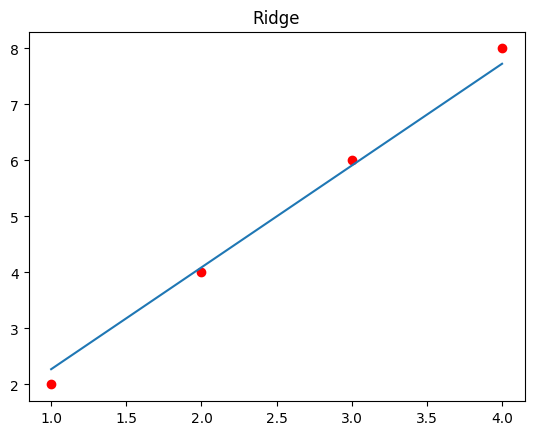

In [57]:
plt.plot(test,pred)
plt.scatter(x,y,color='r')
plt.title('Ridge')

# Lasso Regularization

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

## 1- Lasso

In [59]:
diabetes = load_diabetes()
x, y = diabetes.data, diabetes.target

In [60]:
x.shape

(442, 10)

In [61]:
y.shape

(442,)

In [62]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [63]:
lasso=Lasso(alpha=0.5)
lasso.fit(x_train,y_train)

Lasso(alpha=0.5)

In [64]:
y_pred=lasso.predict(x_test)

## 2- Lasso

In [65]:
df = pd.DataFrame({'X':[1,2,3,4],
                    'y':[2,4,6,8]})
df

,X,y
0,1,2
1,2,4
2,3,6
3,4,8


In [66]:
df.shape

(4, 2)

In [67]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [68]:
lasso=Lasso(alpha=0.5)
lasso.fit(x,y)

Lasso(alpha=0.5)

In [69]:
test=pd.DataFrame([1,2,3,4])
pred=lasso.predict(test)

Text(0.5, 1.0, 'Lasso')

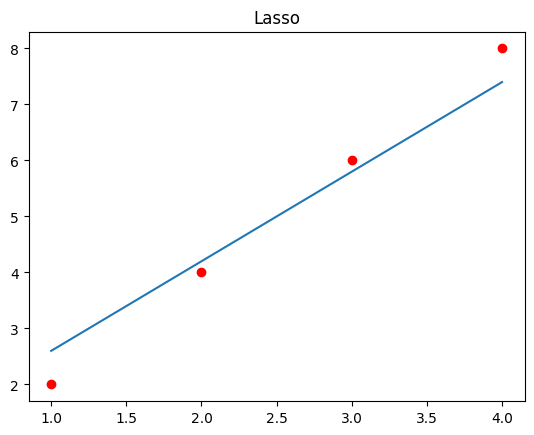

In [70]:
plt.plot(test,pred)
plt.scatter(x,y,color='r')
plt.title('Lasso')

# ElasticNet Regularization

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import ElasticNet
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

## 1- ElasticNet

In [72]:
diabetes = load_diabetes()
x, y = diabetes.data, diabetes.target

In [73]:
x.shape

(442, 10)

In [74]:
y.shape

(442,)

In [75]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [76]:
elasticnet=ElasticNet(alpha=0.5,l1_ratio=0.5)
elasticnet.fit(x_train,y_train)

ElasticNet(alpha=0.5)

In [77]:
y_pred=elasticnet.predict(x_test)

## 2- ElasticNet

In [78]:
df = pd.DataFrame({'X':[1,2,3,4],
                    'y':[2,4,6,8]})
df

,X,y
0,1,2
1,2,4
2,3,6
3,4,8


In [79]:
df.shape

(4, 2)

In [80]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [81]:
elasticnet=ElasticNet(alpha=0.5,l1_ratio=0.5)
elasticnet.fit(x,y)

ElasticNet(alpha=0.5)

In [82]:
test=pd.DataFrame([1,2,3,4])
pred=elasticnet.predict(test)

Text(0.5, 1.0, 'ElasticNet')

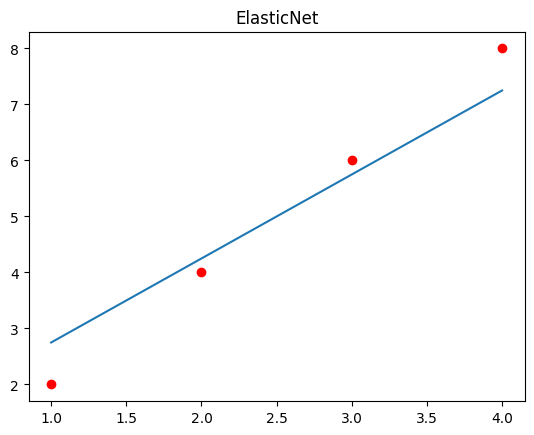

In [83]:
plt.plot(test,pred)
plt.scatter(x,y,color='r')
plt.title('ElasticNet')

# ------------------------------------------

# compare between Ridge, Lasso and ElasticNet

In [84]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.linear_model import Ridge, Lasso,ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import KBinsDiscretizer

In [85]:
# Load the Diabetes dataset
diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target

In [86]:
# Convert the target variable into discrete categories (quartiles)
est = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='quantile')
y_binned = est.fit_transform(y.reshape(-1, 1)).astype(int).ravel()

In [87]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_binned, test_size=0.2, random_state=42)

In [88]:
# Define the regularization strengths
alphas = np.logspace(-4, 1, 50)

In [89]:
# Initialize lists to store accuracy scores
ridge_accuracy = []
lasso_accuracy = []
elasticnet_accuracy = []

In [90]:
# Loop over the range of regularization strengths
for alpha in alphas:
    # Apply Ridge regression
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    y_pred_ridge = np.round(ridge.predict(X_test)).astype(int)
    y_pred_ridge = np.clip(y_pred_ridge, 0, 3)  # Ensure predictions are within valid range
    ridge_accuracy.append(accuracy_score(y_test, y_pred_ridge))
    
    # Apply Lasso regression
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)
    y_pred_lasso = np.round(lasso.predict(X_test)).astype(int)
    y_pred_lasso = np.clip(y_pred_lasso, 0, 3)  # Ensure predictions are within valid range
    lasso_accuracy.append(accuracy_score(y_test, y_pred_lasso))
    
    # Apply elasticnet regression
    elasticnet = ElasticNet(alpha=alpha, l1_ratio=0.5)
    elasticnet.fit(X_train, y_train)
    y_pred_elasticnet = np.round(elasticnet.predict(X_test)).astype(int)
    y_pred_elasticnet = np.clip(y_pred_elasticnet, 0, 3)  # Ensure predictions are within valid range
    elasticnet_accuracy.append(accuracy_score(y_test, y_pred_elasticnet))

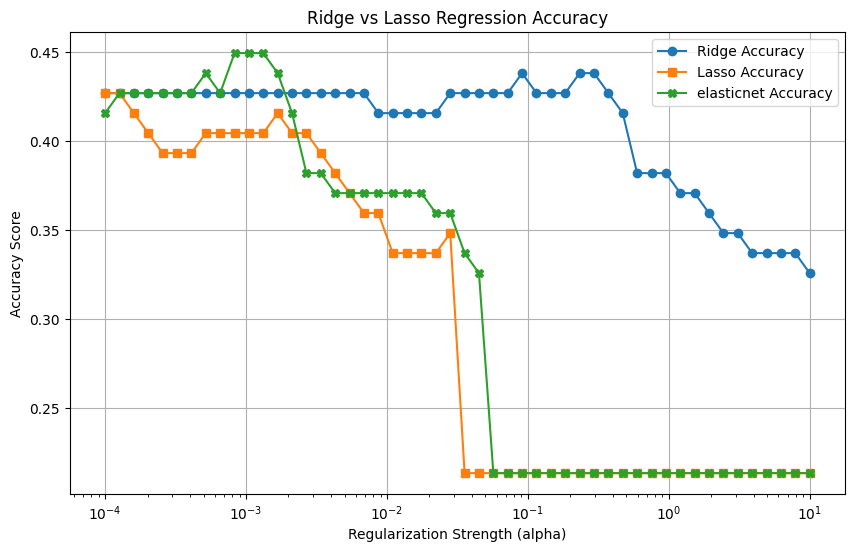

In [91]:
# Plot the accuracy scores for Ridge and Lasso
plt.figure(figsize=(10, 6))
plt.plot(alphas, ridge_accuracy, label='Ridge Accuracy', marker='o')
plt.plot(alphas, lasso_accuracy, label='Lasso Accuracy', marker='s')
plt.plot(alphas, elasticnet_accuracy, label='elasticnet Accuracy', marker='X')
plt.xscale('log')
plt.xlabel('Regularization Strength (alpha)')
plt.ylabel('Accuracy Score')
plt.title('Ridge vs Lasso Regression Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [92]:
# Print the best alpha for Ridge, Lasso and elasticnet
best_alpha_ridge = alphas[np.argmax(ridge_accuracy)]
best_alpha_lasso = alphas[np.argmax(lasso_accuracy)]
best_alphe_elasticnet = alphas[np.argmax(elasticnet_accuracy)]

print(f"Best alpha for Ridge: {best_alpha_ridge}")
print(f"Best alpha for Lasso: {best_alpha_lasso}")
print(f"Best alpha for elasticnet: {best_alphe_elasticnet}\n")
print(f"Best Ridge Accuracy: {max(ridge_accuracy)}")
print(f"Best Lasso Accuracy: {max(lasso_accuracy)}")
print(f"Best elasticnet Accuracy: {max(elasticnet_accuracy)}")

Best alpha for Ridge: 0.09102981779915217
Best alpha for Lasso: 0.0001
Best alpha for elasticnet: 0.0008286427728546842

Best Ridge Accuracy: 0.43820224719101125
Best Lasso Accuracy: 0.42696629213483145
Best elasticnet Accuracy: 0.449438202247191


# ----------------------------------------------------------

In [93]:
# Load the Diabetes dataset
diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target

In [94]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [95]:
# Define the regularization strengths
alphas = np.logspace(-4, 1, 50)

In [96]:
# Initialize lists to store MSE values
ridge_mse = []
lasso_mse = []
elasticnet_mse = []

In [97]:
# Loop over the range of regularization strengths
for alpha in alphas:
    # Apply Ridge regression
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    y_pred_ridge = ridge.predict(X_test)
    ridge_mse.append(mean_squared_error(y_test, y_pred_ridge))
    
    # Apply Lasso regression
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)
    y_pred_lasso = lasso.predict(X_test)
    lasso_mse.append(mean_squared_error(y_test, y_pred_lasso))
    
    # Apply elasticnet regression
    elasticnet = ElasticNet(alpha=alpha, l1_ratio=0.5)
    elasticnet.fit(X_train, y_train)
    y_pred_elasticnet = elasticnet.predict(X_test)
    elasticnet_mse.append(mean_squared_error(y_test, y_pred_elasticnet))

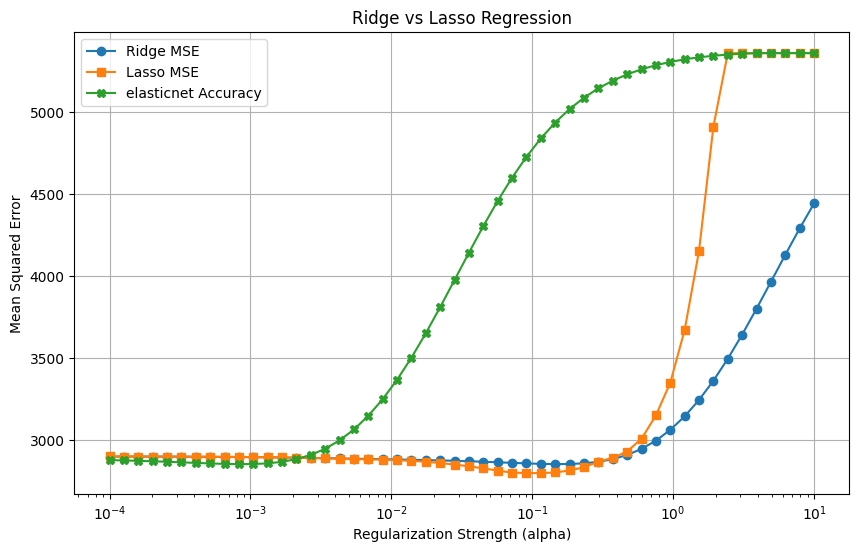

In [98]:
# Plot the MSE for Ridge and Lasso
plt.figure(figsize=(10, 6))
plt.plot(alphas, ridge_mse, label='Ridge MSE', marker='o')
plt.plot(alphas, lasso_mse, label='Lasso MSE', marker='s')
plt.plot(alphas, elasticnet_mse, label='elasticnet Accuracy', marker='X')
plt.xscale('log')
plt.xlabel('Regularization Strength (alpha)')
plt.ylabel('Mean Squared Error')
plt.title('Ridge vs Lasso Regression')
plt.legend()
plt.grid(True)
plt.show()

In [99]:
# Print the best alpha for Ridge, Lasso and elasticnet
best_alpha_ridge = alphas[np.argmin(ridge_mse)]
best_alpha_lasso = alphas[np.argmin(lasso_mse)]
best_alphe_elasticnet = alphas[np.argmax(elasticnet_accuracy)]

print(f"Best alpha for Ridge: {best_alpha_ridge}")
print(f"Best alpha for Lasso: {best_alpha_lasso}")
print(f"Best alpha for elasticnet: {best_alphe_elasticnet}\n")
print(f"Best Ridge MSE: {min(ridge_mse)}")
print(f"Best Lasso MSE: {min(lasso_mse)}")
print(f"Best elasticnet Accuracy: {min(elasticnet_mse)}")


Best alpha for Ridge: 0.14563484775012445
Best alpha for Lasso: 0.11513953993264481
Best alpha for elasticnet: 0.0008286427728546842

Best Ridge MSE: 2853.3653528848185
Best Lasso MSE: 2798.313338447306
Best elasticnet Accuracy: 2853.040414045006
